## RLC Series Ciruit:

$$V(t) = L*\frac{di(t)}{dt}+R*i(t)+\frac{1}{C}\int i(t)\: dt$$<br>
differentiation on Both sides,<br><br>
$$\frac{dV(t)}{dt}=L*\frac{d^2i(t)}{dt^2}+R*\frac{di(t)}{dt}+\frac{i(t)}{C}$$<br>
$$\frac{d^2i(t)}{dt^2}=-\frac{R}{L}*\frac{di(t)}{dt}-\frac{i(t)}{C*L}+\frac{1}{L}\frac{dV(t)}{dt}$$<br><br>
Let, 
* $x_1(t)$ = $i(t)$

* $x_2(t)$ = $\frac{di(t)}{dt}$

for simplicity we write $x_n(t)$ as $x_n$  and also $x_n(t_k)$ is represented as $x_{n(k)}$.
<br>
<br>
Now we have,
$$f^{(1)}(t,x_1,x_2)=\frac{dx_1}{dt} = x_2$$<br>
$$f^{(2)}(t,x_1,x_2)=\frac{dx_2}{dt}=-\frac{R}{L}*x_2-\frac{x_1}{C*L}+\frac{1}{L}\frac{dV(t)}{dt}$$<br><br>
Let initial conditions be,<br>
* $i(t_0) = x_1(t_0) = x_{1(0)}$


* $\frac{di(t_0)}{dt} = x_2(t_0) = x_{2(0)}$


### Matrix form:
$$F(t,x_1,x_2)=
\begin{bmatrix}f^{(1)} \\ f^{(2)} \end{bmatrix}
= \begin{bmatrix}0 & 1 \\ \frac{-1}{C*L} & \frac{-R}{L} \end{bmatrix}
* \begin{bmatrix}x_1(t) \\ x_2(t) \end{bmatrix}
+ \begin{bmatrix} 0 \\ \frac{1}{L} \end{bmatrix}
*[\:\frac{dV(t)}{dt} ]$$<br>

$$F = A*X_k + B*U_k$$<br>
where,
* $A = \begin{bmatrix}0 & 1 \\ \frac{-1}{C*L} & \frac{-R}{L} \end{bmatrix}$


* $X_k= \begin{bmatrix}x_{1(k)} \\ x_{2(k)} \end{bmatrix}$


* $B =  \begin{bmatrix} 0 \\ \frac{1}{L} \end{bmatrix}$


* $U_k = [\:\frac{dV(t)_k}{dt} ]$ 


and matrix form of inital conditions,<br>
$$X_0 = \begin{bmatrix} x_{1(0)}\\ x_{2(0)}\end{bmatrix}$$


### Forward Euler Method:
$$y_{k+1}=y{k}+\Delta\:t * f(t,y_k)$$

comparing this to above matrix equation we get,

$$X_{k+1}=X_{k}+\Delta\:t *F(t,X_k)$$

which implies,<br>
$$X_{k+1} = \begin{bmatrix}x_{1(k+1)}\\x_{2(k+1)}\end{bmatrix}$$<br>
$$X_{k} = \begin{bmatrix}x_{1(k)}\\x_{2(k)}\end{bmatrix}$$<br>
$$F(t,X_k) = F(t,x_1,x_2) = \begin{bmatrix}f^{(1)} \\ f^{(2)} \end{bmatrix} $$

Therefore,<br>
$$\begin{bmatrix}x_{1(k+1)}\\x_{2(k+1)}\end{bmatrix}= \begin{bmatrix}x_{1(k)}\\x_{2(k)}\end{bmatrix}+ \Delta\:t* \begin{bmatrix}f^{(1)} \\ f^{(2)} \end{bmatrix}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ut(t):
    b = 0.5e-3
    v = np.heaviside(t-b,0.9)
    return v

In [3]:
# time 
t0 = 0 
tend = 2e-3
n = int(1001)
time = np.linspace(t0, tend, n+1)
dt = abs(t0-tend)/n

In [4]:
def F(t,A,X0,B,Uin_at_k):
    A = np.asarray(A)
    X0 = np.asarray(X0)
    B = np.asarray(B)
    U = np.array(Uin_at_k)
    return A.dot(X0)+B.dot(U)

In [5]:
# defining circuit parameters
R = 10
L = 1e-3
C = 2e-6

# forming Matrix parameters
A = np.array([
              [0, 1],
              [(-1/(C*L)), (-R/L)]
])

B = np.array([
              [0],
              [(1/L)]
])

X0 = np.array([
               [0],
               [0]
])

# defining input
Uin0 = ut(time) #V(t) np.sin(2*np.pi*1e3*time)#
Uin = Uin0[1:] - Uin0[:-1]
Uin = np.insert(Uin,0,Uin[0])/dt #dV(t)/dt

In [6]:
Xsln = np.zeros(
    (len(X0[:,0]) ,
     len(time))
)
X_0 = X0
for i in range(len(time)):
    tmp = X_0 + dt * F(time[i],A,X_0,B,Uin[i])
    X_0 = tmp
    Xsln[0,i] = tmp[0]
    Xsln[1,i] = tmp[1] 

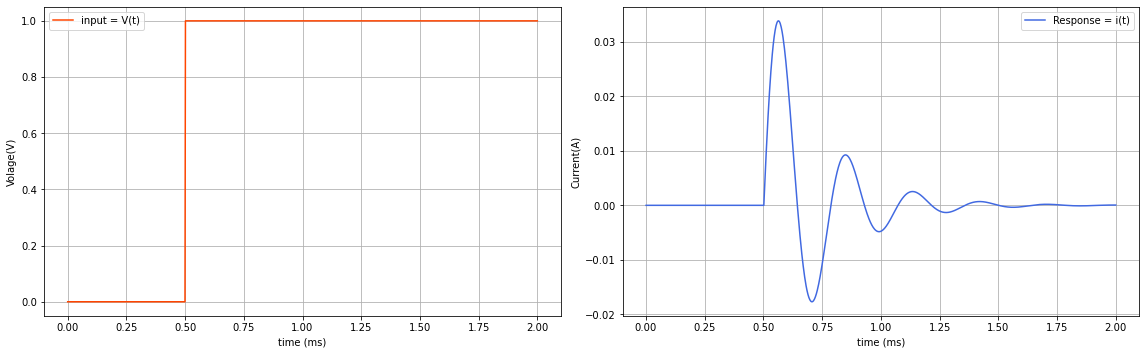

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(122)
plt.plot(time*1000,Xsln[0,:],'royalblue',label='Response = i(t)')
plt.xlabel('time (ms)')
plt.ylabel('Current(A)')
plt.grid(1)
plt.legend(loc="best")
plt.subplot(121)
plt.plot(time*1000,Uin0,'orangered',label = 'input = V(t)')
plt.ylabel('Volage(V)')
plt.xlabel('time (ms)')
plt.grid(1)
plt.legend(loc="best")
plt.tight_layout(pad=1);